In [9]:
# load the necessary module
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
from sklearn.decomposition import PCA
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# first neural network with keras tutorial
from numpy import loadtxt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 40}

matplotlib.rc('font', **font)

In [10]:
# California snapshots
CA_ASO_files = [ 'California_CSV_files/CE20180423Data_set_SWE.csv', 'California_CSV_files/KC20190326_Data_set_SWE.csv', 'California_CSV_files/KN20190417_Data_set_SWE.csv', 
                'California_CSV_files/LB20190309_Data_set_SWE.csv', 'California_CSV_files/TE20190417_Data_set_SWE.csv', 'California_CSV_files/TB20180423_Data_set_SWE.csv', 
               'California_CSV_files/MB20190329_Data_set_SWE.csv', 'California_CSV_files/SF20180423_Data_set_SWE.csv', 'California_CSV_files/SJ20190325_Data_set_SWE.csv']
#Colorado Snapshots
COl_ASO_files = [ 'GE20180331_Data_set_SWE.csv', 'GE20190407_Data_set_SWE.csv', 'CB20160404_Data_set_SWE.csv',
                        'CM20190407_Data_set_SWE.csv', 'BR20190419_Data_set_SWE.csv', 'GT20190408_Data_set_SWE.csv',
                        'GT20180330_Data_set_SWE.csv']

# Factor analysis model for winter Snapshots in California and Colorado




# California With SWE

In [11]:
# creating the Dataframe and variable into X California
CA_dataframe = pd.read_csv(CA_ASO_files[0], index_col = 0)

for file in CA_ASO_files[1:]:
    dataframe = pd.read_csv(file, index_col = 0)
    CA_dataframe = pd.concat([CA_dataframe, dataframe], ignore_index=True)
    print(CA_dataframe.shape)

CA_dataset = CA_dataframe.values
CA_X = CA_dataset[:, 2:10]

# creating the Dataframe and variable into X COlarado
COL_dataframe = pd.read_csv(COl_ASO_files[0], index_col = 0)

for file in COl_ASO_files[1:]:
    dataframe = pd.read_csv(file, index_col = 0)
    COL_dataframe = pd.concat([COL_dataframe, dataframe], ignore_index=True)
    
COL_dataset = COL_dataframe.values
COL_X = COL_dataset[:, 2:10]




(2335, 10)
(3098, 10)
(3110, 10)
(5258, 10)
(6705, 10)
(7778, 10)
(8949, 10)
(10679, 10)


# Variance and Communality 

In [12]:
from factor_analyzer import FactorAnalyzer

# Perform factor analysis
fa_CA = FactorAnalyzer(n_factors = 2, rotation = 'varimax',method='ml')
fa_CA.fit(CA_X)
X_fa_CA = fa_CA.transform(CA_X)
print('Portion of variance explained by Factors: '+ str(np.mean(np.square(fa_CA.loadings_),axis = 0)))
print('Communality: '+str(np.sum(np.square(fa_CA.loadings_),axis = 1)))
var_f1 = np.mean(np.square(fa_CA.loadings_),axis = 0)[0]
var_f2 = np.mean(np.square(fa_CA.loadings_),axis = 0)[1]
#var_f3 = np.mean(np.square(fa_CA.loadings_),axis = 0)[2]
fa_CA.loadings_

Portion of variance explained by Factors: [0.51198705 0.17399759]
Communality: [7.37168622e-02 2.35081574e-04 9.19410590e-01 9.38171753e-01
 9.47505515e-01 8.31028873e-01 9.95141341e-01 7.82667129e-01]


array([[-0.24638198, -0.11407357],
       [-0.00703593,  0.01362267],
       [ 0.9435854 , -0.17046169],
       [-0.96731615, -0.04971137],
       [ 0.82714872,  0.51315739],
       [ 0.30978374,  0.8573581 ],
       [-0.99746642, -0.01421564],
       [ 0.65879336,  0.59047306]])

# Factor loading

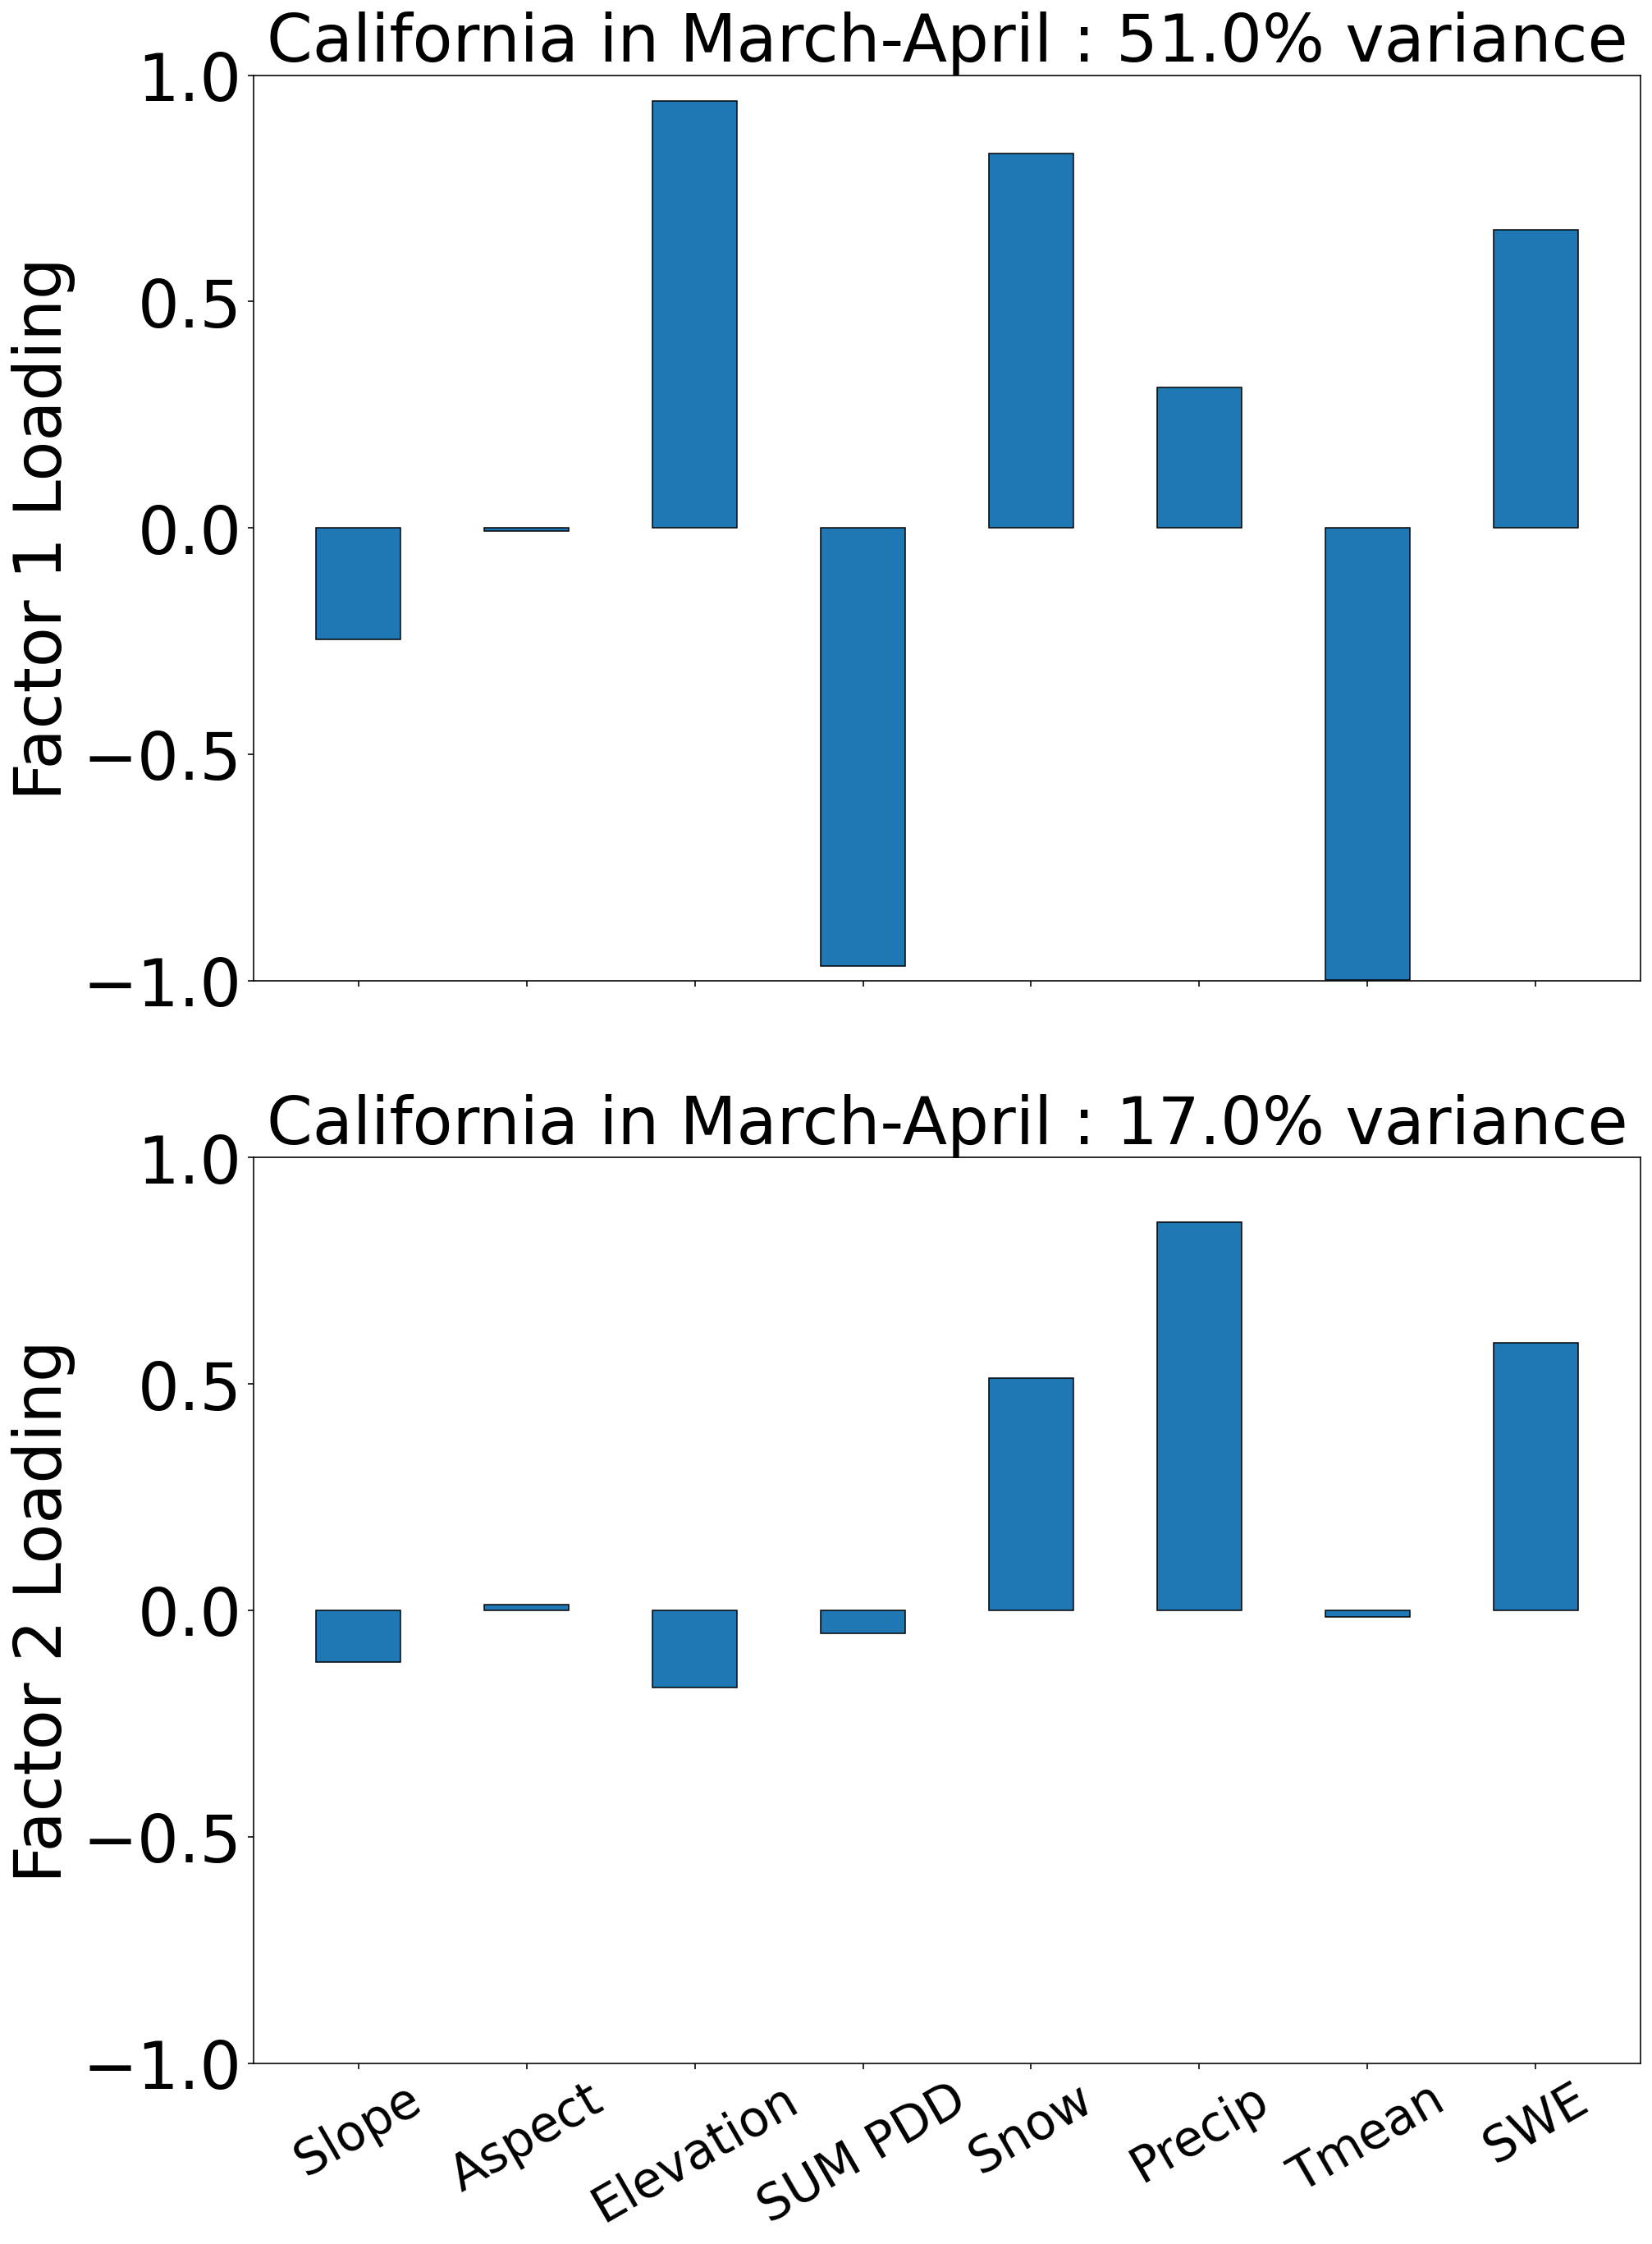

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Define the figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(15, 20), sharex=True)

bars = ['Slope', 'Aspect', 'Elevation',  'SUM PDD', 'Snow', 'Precip',  'Tmean', 'SWE']

# First subplot
axs[0].bar(range(len(bars)), fa_CA.loadings_.T[0], edgecolor='k', linewidth=0.75, width=0.5)
axs[0].set_ylim(-1, 1)
axs[0].set_yticks(np.arange(-1, 1.1, 0.5))
axs[0].set_ylabel('Factor 1 Loading', fontsize=40)
axs[0].set_title('California in March-April : ' + str(np.round((var_f1)*100)) + '% variance', fontsize=40)

# Second subplot
axs[1].bar(range(len(bars)), fa_CA.loadings_.T[1], edgecolor='k', linewidth=0.75, width=0.5)
axs[1].set_ylim(-1, 1)
axs[1].set_yticks(np.arange(-1, 1.1, 0.5))
axs[1].set_ylabel('Factor 2 Loading', fontsize=40)
axs[1].set_title('California in March-April : ' + str(np.round((var_f2)*100)) + '% variance', fontsize=40)

# Shared x-axis labels
axs[1].set_xticks(range(len(bars)))
axs[1].set_xticklabels(bars, rotation=30, fontsize=30)

# Adjust layout and save the figure
fig.tight_layout()
fig.savefig('/scratch/users/lie08/FA_plots/CA_FA_loadingplot_winter_equal_y.pdf')


# Colorado Data With SWE

# Variance and Communality

In [14]:
from factor_analyzer import FactorAnalyzer

# Perform factor analysis
fa_COL = FactorAnalyzer(n_factors = 3, rotation = 'varimax',method='ml')
fa_COL.fit(COL_X)
X_fa_COL = fa_COL.transform(COL_X)
print('Portion of variance explained by Factors: '+ str(np.mean(np.square(fa_COL.loadings_),axis = 0)))
print('Communality: '+str(np.sum(np.square(fa_COL.loadings_),axis = 1)))
var_f1 = np.mean(np.square(fa_COL.loadings_),axis = 0)[0]
var_f2 = np.mean(np.square(fa_COL.loadings_),axis = 0)[1]
var_f3 = np.mean(np.square(fa_COL.loadings_),axis = 0)[2]
fa_COL.loadings_

Portion of variance explained by Factors: [0.39962776 0.12282857 0.11629053]
Communality: [0.20869017 0.0213904  0.99500199 0.14894984 0.99544821 0.99526208
 0.99500752 0.75022459]


array([[ 0.28390943,  0.31862256,  0.16298857],
       [-0.01576938,  0.06119067, -0.13189932],
       [ 0.40002928,  0.81473813, -0.41373945],
       [ 0.01047034, -0.37883831,  0.07295032],
       [ 0.98384028,  0.09443356, -0.13634083],
       [ 0.99463126,  0.07369557, -0.0232315 ],
       [-0.56756014,  0.05823072,  0.81822503],
       [ 0.82260453,  0.22870866, -0.14573509]])

# Factor Loading 

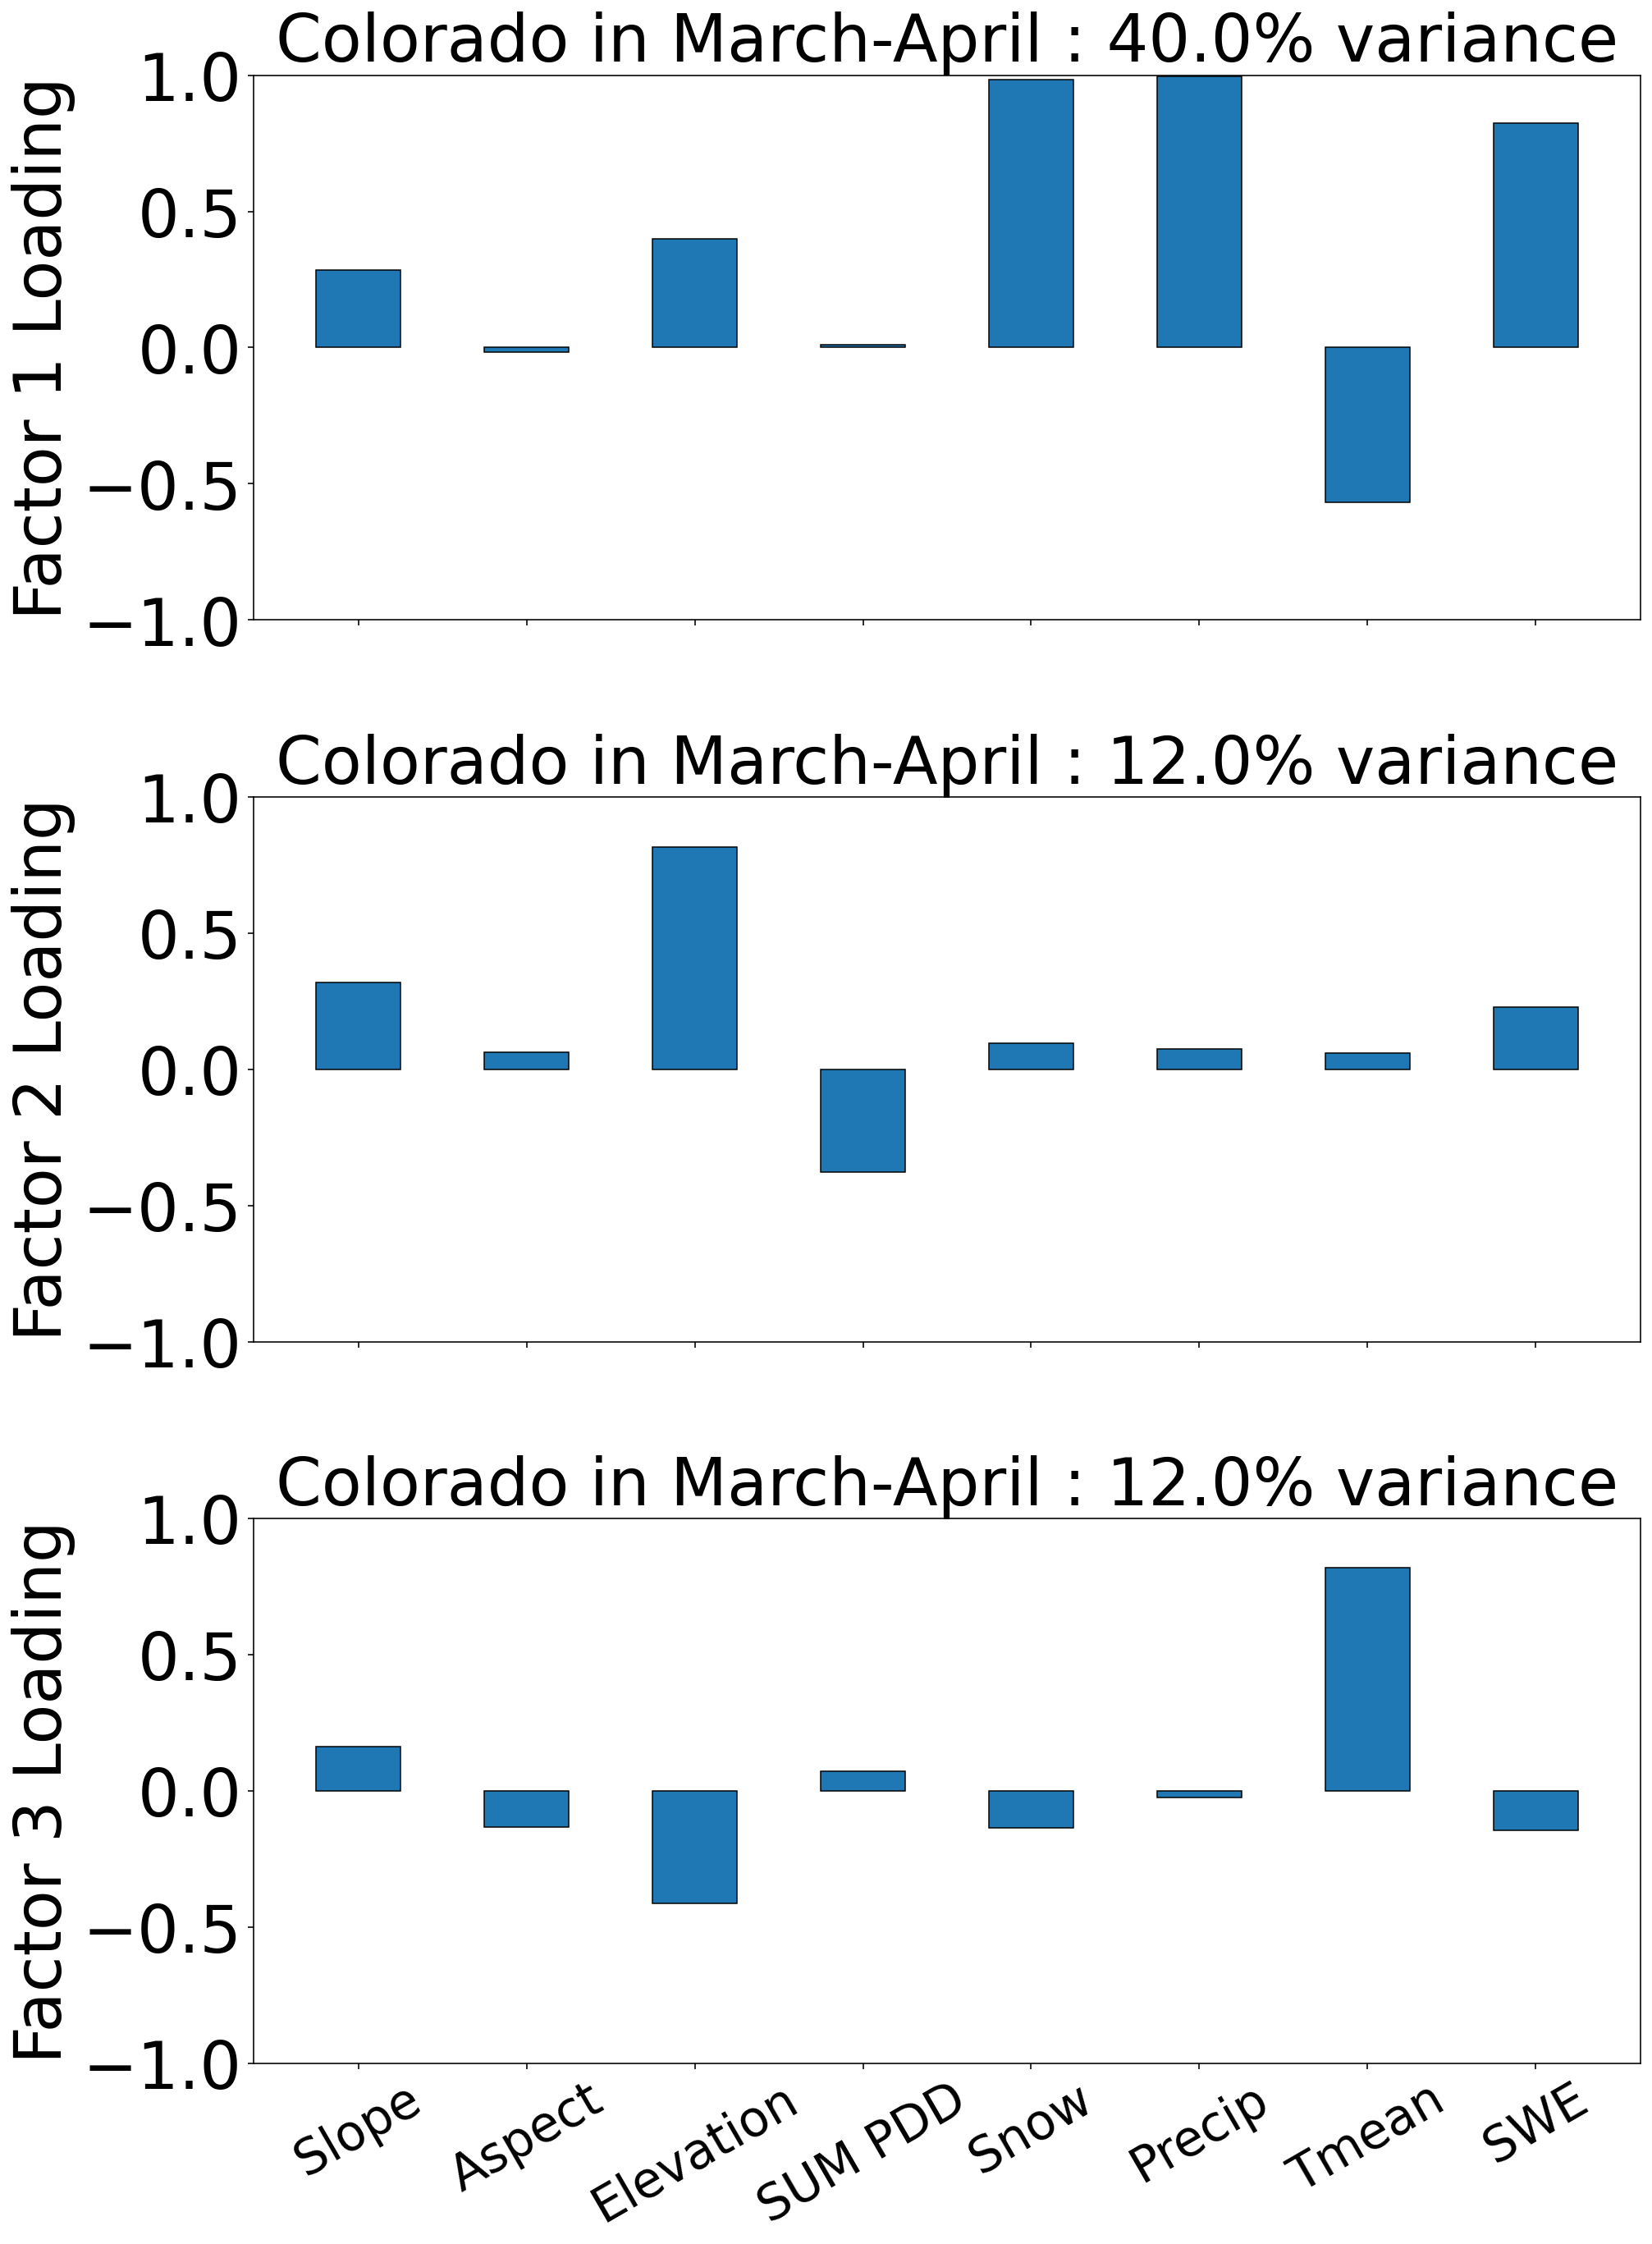

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Define the figure and subplots
fig, axs = plt.subplots(3, 1, figsize=(15, 20), sharex=True)

bars = ['Slope', 'Aspect', 'Elevation',  'SUM PDD', 'Snow', 'Precip',  'Tmean', 'SWE']

# First subplot
axs[0].bar(range(len(bars)), fa_COL.loadings_.T[0], edgecolor='k', linewidth=0.75, width=0.5)
axs[0].set_ylim(-1, 1)
axs[0].set_yticks(np.arange(-1, 1.1, 0.5))
axs[0].set_ylabel('Factor 1 Loading', fontsize=40)
axs[0].set_title('Colorado in March-April : ' + str(np.round((var_f1)*100)) + '% variance', fontsize=40)

# Second subplot
axs[1].bar(range(len(bars)), fa_COL.loadings_.T[1], edgecolor='k', linewidth=0.75, width=0.5)
axs[1].set_ylim(-1, 1)
axs[1].set_yticks(np.arange(-1, 1.1, 0.5))
axs[1].set_ylabel('Factor 2 Loading', fontsize=40)
axs[1].set_title('Colorado in March-April : ' + str(np.round((var_f2)*100)) + '% variance', fontsize=40)

# Third subplot
axs[2].bar(range(len(bars)), fa_COL.loadings_.T[2], edgecolor='k', linewidth=0.75, width=0.5)
axs[2].set_ylim(-1, 1)
axs[2].set_yticks(np.arange(-1, 1.2, 0.5))
axs[2].set_ylabel('Factor 3 Loading', fontsize=40)
axs[2].set_title('Colorado in March-April : ' + str(np.round((var_f3)*100)) + '% variance', fontsize=40)

# Shared x-axis labels
axs[2].set_xticks(range(len(bars)))
axs[2].set_xticklabels(bars, rotation=30, fontsize=30)

# Adjust layout and save the figure
fig.tight_layout()
fig.savefig('/scratch/users/lie08/FA_plots/COL_FA_loadingplot_winter_equal_y.pdf')
